<a href="https://colab.research.google.com/github/compile1-bit/cifar10/blob/main/cifar10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

# Download datasets

In [15]:
with tarfile.open('/content/cifar10.tgz', 'r:gz') as tar:
    tar.extractall()

/tmp/ipython-input-2229108946.py:2: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


In [16]:
data_dir = '/content/cifar10'

print(os.listdir(data_dir))

classes = os.listdir('/content/cifar10/train')
print(classes)

['test', 'train']
['airplane', 'truck', 'frog', 'cat', 'automobile', 'horse', 'dog', 'bird', 'ship', 'deer']


In [17]:
airplane_files = os.listdir('/content/cifar10/train/airplane')
print('number of trainin example for airplane:', len(airplane_files))
print(airplane_files[:5])

number of trainin example for airplane: 5000
['2334.png', '2286.png', '4588.png', '0131.png', '1315.png']


In [18]:
ship_test_files = os.listdir('/content/cifar10/test/ship')
print('number of tesin example for ship:', len(ship_test_files))
print(ship_test_files[:5])

number of tesin example for ship: 1000
['0131.png', '0251.png', '0693.png', '0916.png', '0938.png']


In [19]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [20]:
dataset = ImageFolder('/content/cifar10/train', transform = ToTensor())

In [21]:
len(dataset)

50000

In [30]:
img , label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [23]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [27]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [25]:
def show_example(img, label):
  print('label:', dataset.classes[label],"(" + str(label)+")")
  plt.imshow(img.permute(1,2,0))


label: airplane (0)


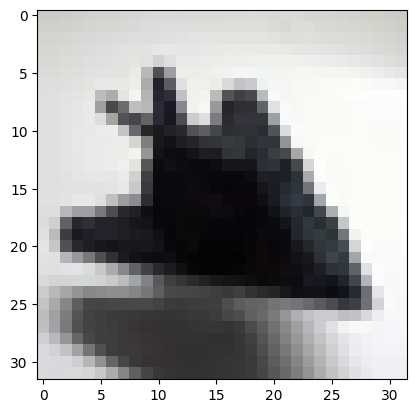

In [31]:
img,label = dataset[0]# it is the same as *dataset[0]
show_example(*dataset[0])

label: airplane (0)


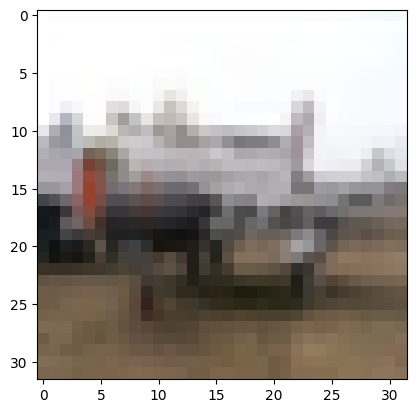

In [32]:
show_example(*dataset[1000])

label: bird (2)


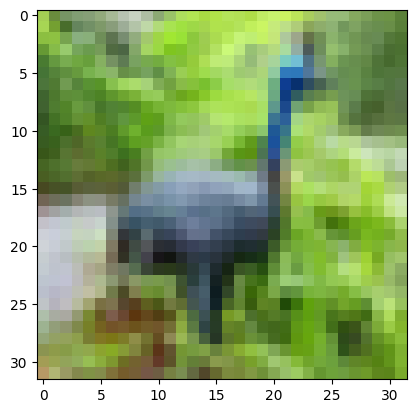

In [34]:
show_example(*dataset[10000])

label: deer (4)


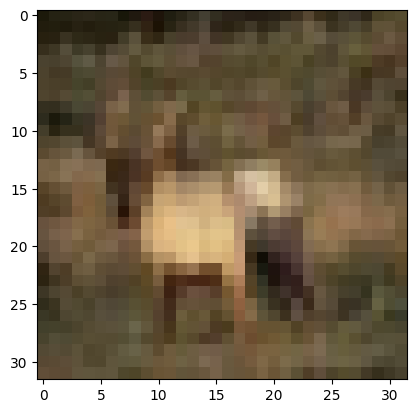

In [35]:
show_example(*dataset[20000])

# Training and Validation Dataset

In [36]:
random_seed = 42
torch.manual_seed(random_seed);

In [38]:
val_size = 5000
train_size = len(dataset) - val_size
train_size

45000

In [39]:
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [ ]:
!git clone https://github.com/username/repository-name.git